<a href="https://colab.research.google.com/github/VitaliiaCa/computer_vision_hw2/blob/main/HW2_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

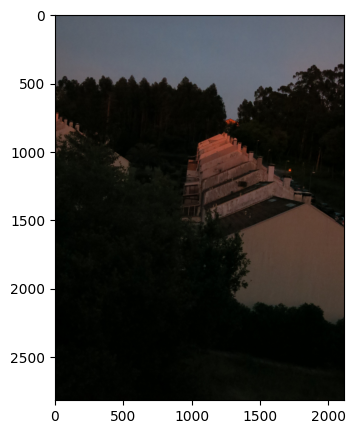

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

img = cv2.imread('/content/IMG_9209.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Find the location of the maximum value
_, _, _, max_loc = cv2.minMaxLoc(gray)

# max_loc returns (column, row)
col, row = max_loc
print(f"The brightest pixel is at Row: {row}, Col: {col}")

# Use this for your white patch
white = img[row, col, :]

The brightest pixel is at Row: 1139, Col: 1722


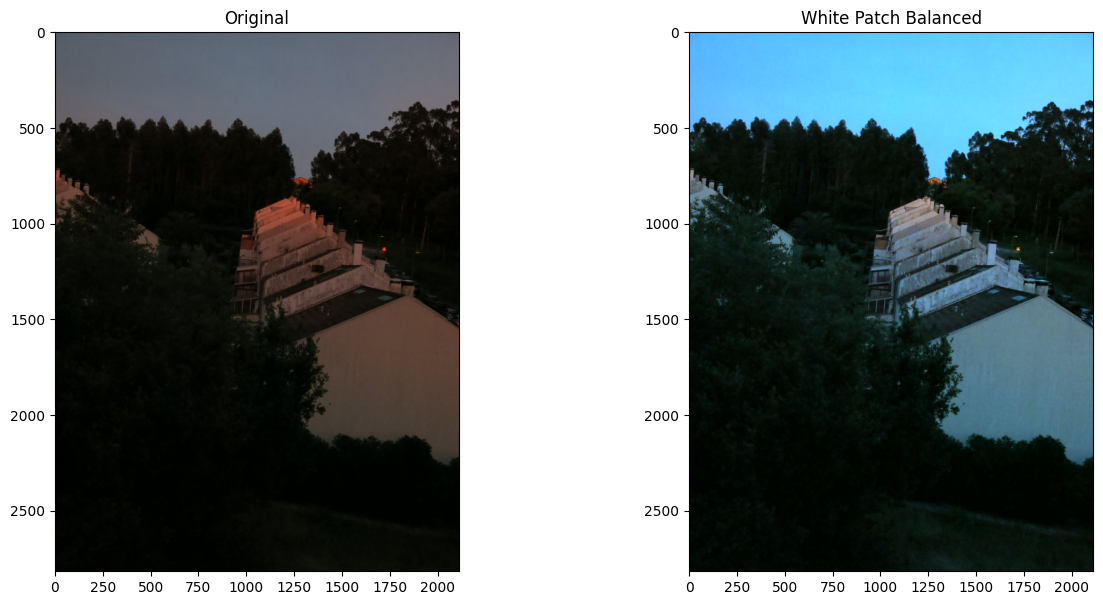

In [4]:
row, col = 1139, 1722

# 3. Get the RGB values at that pixel and calculate scaling coefficients
white_sample = img[row, col, :]
coeffs = 255.0 / white_sample

# 4. Apply balancing (scaling each channel)
balanced = img.astype(np.float32)
for channel in range(3):
    balanced[..., channel] *= coeffs[channel]

# 5. Clip values to [0, 1] range to avoid "blown out" pixels
balanced = np.clip(balanced / 255.0, 0, 1)

# 6. Display results
plt.figure(figsize=(15, 7))
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(balanced), plt.title('White Patch Balanced')
plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x7a8c6b35a870>)

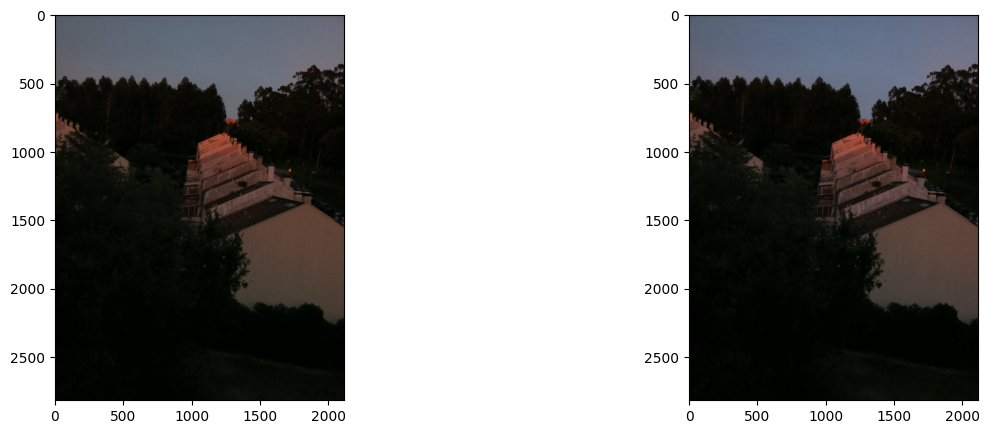

In [6]:
img = cv2.imread('/content/IMG_9209.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
max_mean = max(mean_r, mean_g, mean_b)

kr = max_mean / mean_r
kg = max_mean / mean_g
kb = max_mean / mean_b

# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
balanced[:, :, 0] = img[:, :, 0] * kr
balanced[:, :, 1] = img[:, :, 1] * kg
balanced[:, :, 2] = img[:, :, 2] * kb

balanced = np.clip(balanced, 0, 255).astype(np.uint8)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

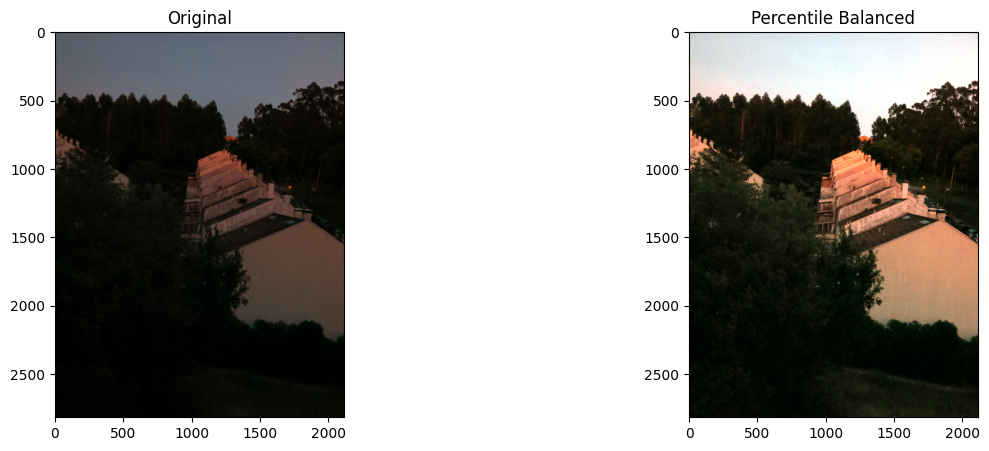

In [7]:
img = cv2.imread('/content/IMG_9209.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. FIND THE WHITE REFERENCE (Replace your mean calculation with this)
# This finds the brightness level that 95% of pixels are below
white_ref = np.percentile(img, 95, axis=(0, 1))

# 3. COMPUTE THE COEFFICIENTS
# If white_ref is [200, 180, 220], this scales them all toward 255
coeffs = 255.0 / white_ref

# 4. APPLY TO CHANNELS
balanced = np.zeros_like(img, dtype=np.float32)
for i in range(3):
    balanced[:, :, i] = img[:, :, i] * coeffs[i]

# 5. CLIP AND CONVERT
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

# 6. SHOW RESULTS
plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(balanced), plt.title('Percentile Balanced')
plt.show()

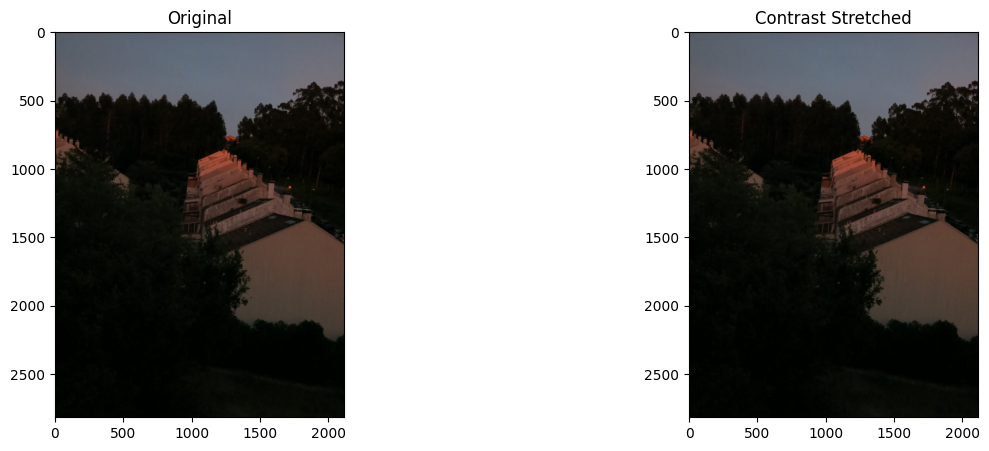

In [8]:
img_min = img.min()
img_max = img.max()

# 2. Stretch the values to fill the 0-255 range
# This improves contrast and "cleans" the colors without shifting the tint as much
balanced = (img - img_min) * (255.0 / (img_max - img_min))

# 3. Convert back to show
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(balanced), plt.title('Contrast Stretched')
plt.show()

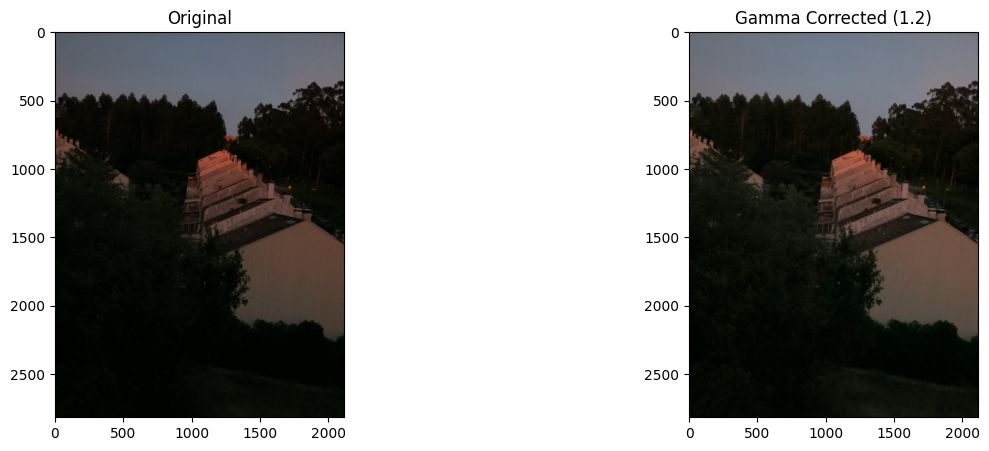

In [9]:
# Change gamma to > 1 to brighten shadows, < 1 to darken them
# Try 1.2 or 1.5 to make it "pop" more like the eye sees
gamma = 1.2
invGamma = 1.0 / gamma

# Apply gamma correction
balanced = np.array(255 * (img / 255) ** invGamma, dtype='uint8')

plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(balanced), plt.title(f'Gamma Corrected ({gamma})')
plt.show()
